In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read CSV file

In [ ]:
df = pd.read_csv("traindata.csv")
df.head(10)

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2010-01-01,0:39,NaN,M,1981.0,29.0,White,Other Traffic Violation,Moving violation,True,"Incident to Arrest,Probable Cause",Citation,False,16-30 Min,True
1,2010-01-01,1:28,NaN,M,1963.0,47.0,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,16-30 Min,False
2,2010-01-01,1:35,NaN,M,1988.0,22.0,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,30+ Min,False
3,2010-01-01,3:48,NaN,M,1952.0,58.0,Black,Call for Service,Other,False,NaN,Citation,False,16-30 Min,False
4,2010-01-01,10:04,NaN,M,1978.0,32.0,Black,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
5,2010-01-01,10:42,NaN,F,1978.0,32.0,White,Speeding,Speeding,False,NaN,Citation,False,16-30 Min,False
6,2010-01-01,10:59,NaN,M,1970.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
7,2010-01-01,14:50,NaN,M,1964.0,46.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
8,2010-01-01,21:26,NaN,M,1984.0,26.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
9,2010-01-01,23:19,NaN,M,1989.0,21.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7561 entries, 0 to 7560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           7561 non-null   object 
 1   stop_time           7561 non-null   object 
 2   county_name         0 non-null      float64
 3   driver_gender       6995 non-null   object 
 4   driver_age_raw      6995 non-null   float64
 5   driver_age          6952 non-null   float64
 6   driver_race         6995 non-null   object 
 7   violation_raw       6995 non-null   object 
 8   violation           6995 non-null   object 
 9   search_conducted    7561 non-null   bool   
 10  search_type         290 non-null    object 
 11  stop_outcome        6995 non-null   object 
 12  is_arrested         6995 non-null   object 
 13  stop_duration       6995 non-null   object 
 14  drugs_related_stop  7561 non-null   bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 782.8+

Data checks

In [ ]:
df.isna().sum()

stop_date                0
stop_time                0
county_name           7561
driver_gender          566
driver_age_raw         566
driver_age             609
driver_race            566
violation_raw          566
violation              566
search_conducted         0
search_type           7271
stop_outcome           566
is_arrested            566
stop_duration          566
drugs_related_stop       0
dtype: int64

See number of rows and columns

In [ ]:
df.shape

(7561, 15)

Description

In [ ]:
df.describe()

,county_name,driver_age_raw,driver_age
count,0.0,6995.000000,6952.000000
mean,NaN,1962.519085,35.342204
std,NaN,154.913999,13.174050
min,NaN,0.000000,15.000000
25%,NaN,1965.000000,24.000000
50%,NaN,1978.000000,32.000000
75%,NaN,1986.000000,45.000000
max,NaN,1995.000000,81.000000


Lots of empty county names, no use

In [ ]:
df = df.drop(columns=["county_name"])

Since driver gender is key to analysis, and we can see rows without gender don't have other stuff as well, let's drop rows which don't have it listed

In [ ]:
df = df.dropna(axis=0, subset=["driver_gender"])

Let's get a look at our clean(ed) data



In [ ]:
df.isnull().sum()

stop_date                0
stop_time                0
driver_gender            0
driver_age_raw           0
driver_age              43
driver_race              0
violation_raw            0
violation                0
search_conducted         0
search_type           6705
stop_outcome             0
is_arrested              0
stop_duration            0
drugs_related_stop       0
dtype: int64

In [ ]:
df.shape

(6995, 13)

Let's see the curious cases of violation and violation_raw

In [ ]:
df["violation"].unique()

array(['Moving violation', 'Other', 'Speeding', 'Equipment',
       'Registration/plates'], dtype=object)

In [ ]:
df["violation_raw"].unique()

array(['Other Traffic Violation', 'Call for Service', 'Speeding',
       'Equipment/Inspection Violation', 'Special Detail/Directed Patrol',
       'Registration Violation', 'Motorist Assist/Courtesy',
       'Violation of City/Town Ordinance', 'Suspicious Person', 'Warrant',
       'APB'], dtype=object)

Stop Timings

In [ ]:
df.stop_time.dtype

df['stop_time']=pd.to_datetime(df.stop_time,format='%H:%M')
df['stop_hour']=df['stop_time'].dt.hour

df['stop_hour'].value_counts()

10    584
9     562
7     469
8     464
14    406
11    399
23    394
0     384
13    360
15    358
6     313
16    291
12    289
1     279
17    219
2     214
22    207
19    206
20    189
18    169
21    109
3      78
4      28
5      24
Name: stop_hour, dtype: int64

Visualize

<Axes: xlabel='count', ylabel='stop_hour'>

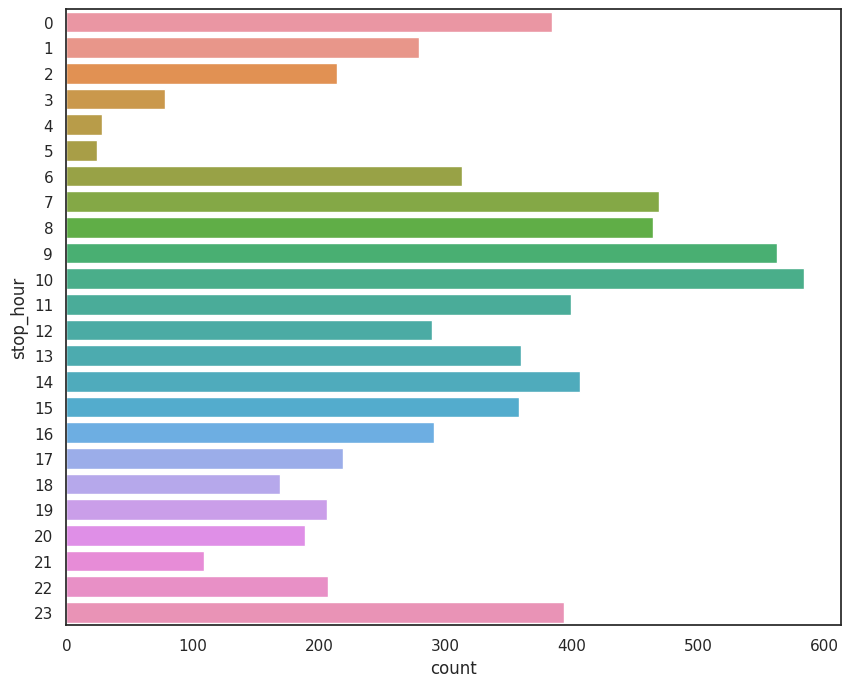

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(y='stop_hour',data=df,)


Stop Duration

In [ ]:
df['stop_duration'].value_counts()

0-15 Min     5081
16-30 Min    1557
30+ Min       357
Name: stop_duration, dtype: int64

In [ ]:
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}
df['stop_minutes'] = df.stop_duration.map(mapping)
df.groupby('violation_raw').stop_minutes.agg(['mean', 'count'])

,mean,count
violation_raw,,
APB,21.000000,4
Call for Service,24.236364,110
Equipment/Inspection Violation,13.600478,836
Motorist Assist/Courtesy,19.833333,12
Other Traffic Violation,15.644884,1515
Registration Violation,15.450311,322
Special Detail/Directed Patrol,13.815789,456
Speeding,11.494070,3710
Suspicious Person,17.888889,9


Time vs type breakdown

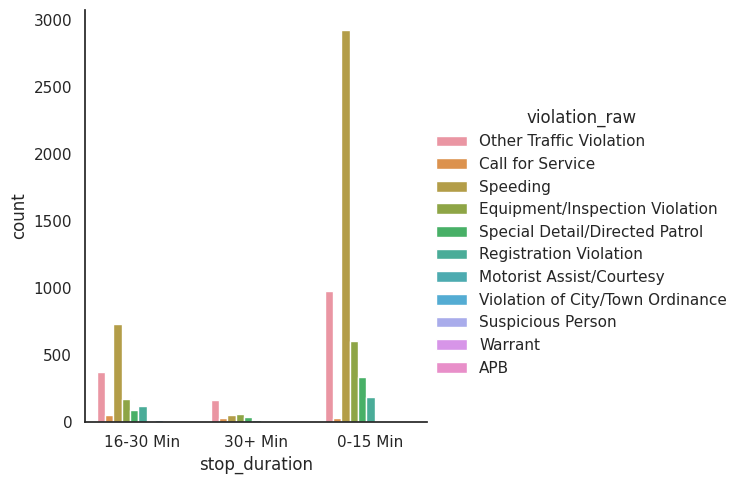

In [ ]:
sns.catplot(x="stop_duration", data=df, hue="violation_raw", kind="count")

Visualize stop time for different violations

<Axes: ylabel='violation_raw'>

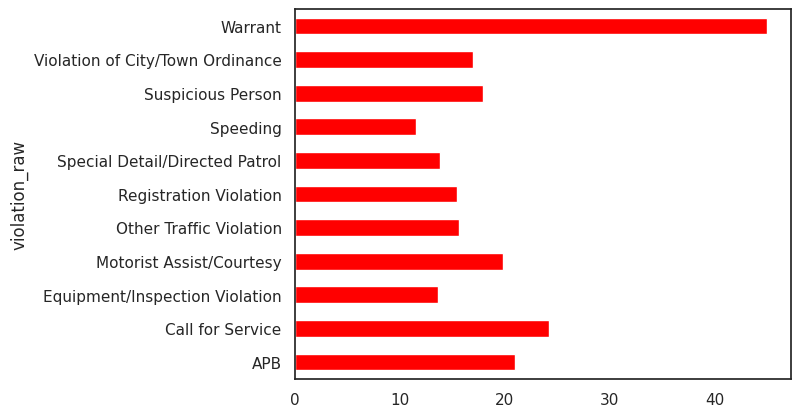

In [ ]:
df.groupby(by='violation_raw').stop_minutes.mean().plot(kind='barh',color='red')


Let's see what races we're working with

In [ ]:
print(df["driver_race"].unique())
len(df["driver_race"].unique())

['White' 'Black' 'Hispanic' 'Asian' 'Other']


5

Let's check out Date range

In [ ]:
df['stop_date'] = pd.to_datetime(df['stop_date'])

min_date = df['stop_date'].min()
print("Minimum date: ", min_date)
max_date = df['stop_date'].max()
print("Maximum date: ", max_date)
date_range = max_date - min_date
print("Date range: ", date_range)

Minimum date:  2010-01-01 00:00:00
Maximum date:  2010-12-31 00:00:00
Date range:  364 days 00:00:00


Time for age- must see

In [ ]:
bin_edges = [0, 17, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 76, 110]
bin_labels = ['Less than 18', '18 - 25', '26 - 30', '31 - 35', '36 - 40','41 - 45', '46 - 50', '51 - 55', '56 - 60', '61 - 65', '66 - 70', '71 - 75', 'over 76']
df['age_break_down'] = pd.cut(df['driver_age'], bin_edges, labels=bin_labels)
df.groupby(df['age_break_down']).size()

age_break_down
Less than 18      41
18 - 25         2113
26 - 30         1029
31 - 35          741
36 - 40          662
41 - 45          675
46 - 50          608
51 - 55          489
56 - 60          302
61 - 65          174
66 - 70           65
71 - 75           39
over 76           14
dtype: int64

Relation between age and violation

In [ ]:
df.groupby(by='violation').driver_age.describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,835.0,31.409581,10.820196,16.0,23.0,28.0,39.0,72.0
Moving violation,1503.0,40.695276,13.493660,15.0,29.0,40.0,51.0,80.0
Other,592.0,42.246622,12.264154,17.0,33.0,43.0,52.0,77.0
Registration/plates,321.0,33.897196,11.413206,17.0,24.0,32.0,42.0,73.0
Speeding,3701.0,33.076466,12.742898,17.0,23.0,29.0,42.0,81.0


Visualize graphically

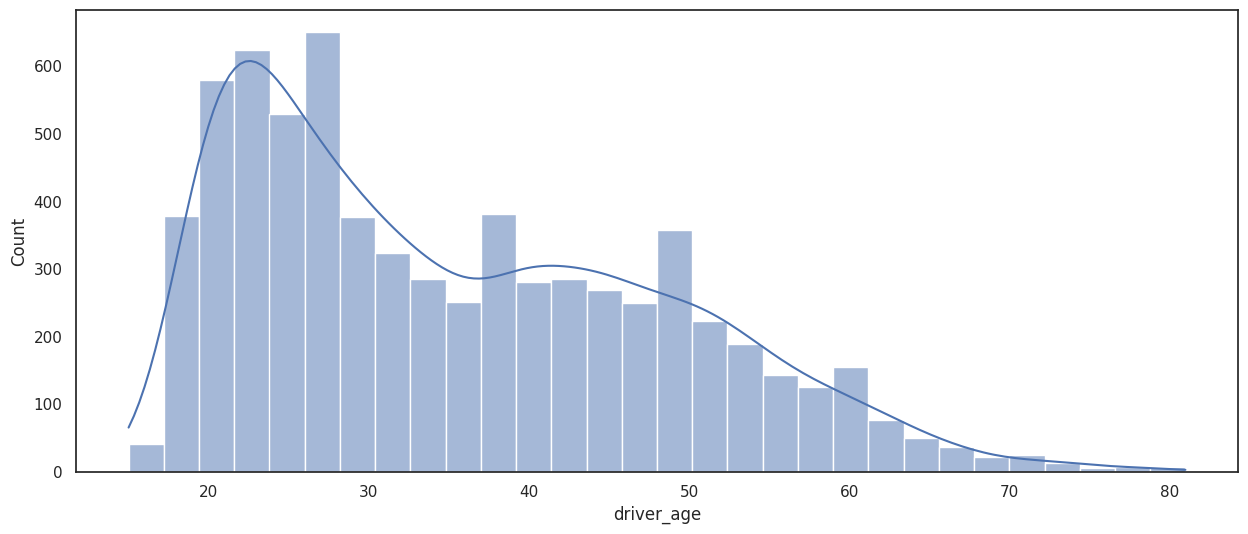

In [ ]:
plt.figure(figsize = (15,6))
sns.histplot(df.driver_age, kde = True)
plt.xticks(rotation=0);

Male and female subdivisions

In [ ]:
female = df[df.driver_gender == 'F']
male = df[df.driver_gender == 'M']

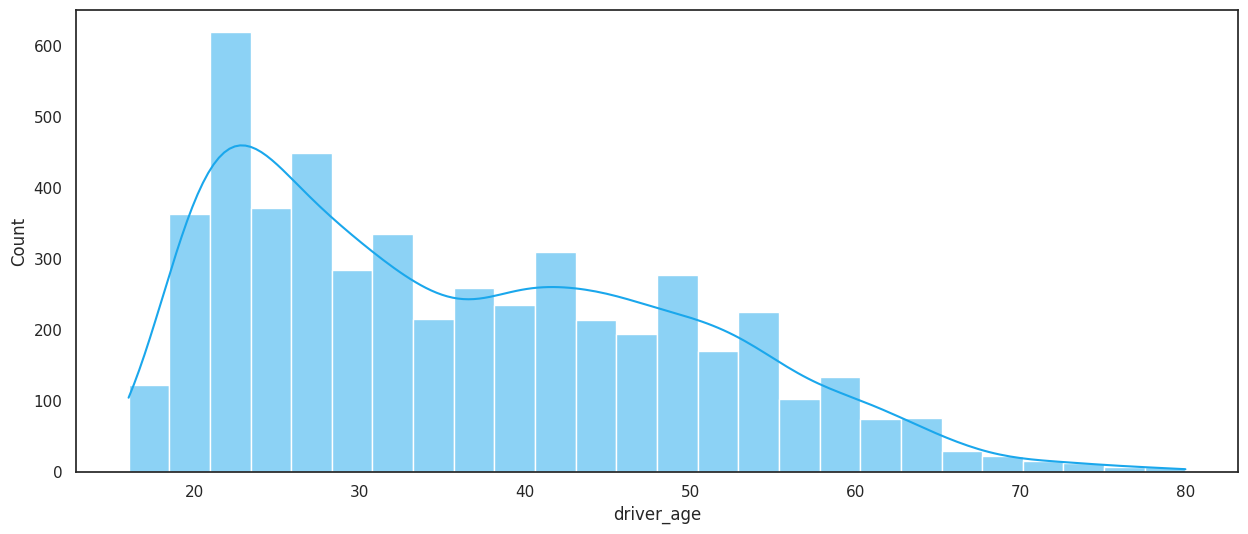

In [ ]:
plt.figure(figsize = (15,6))
sns.histplot(male.driver_age, color = '#1AA7EC', kde = True);

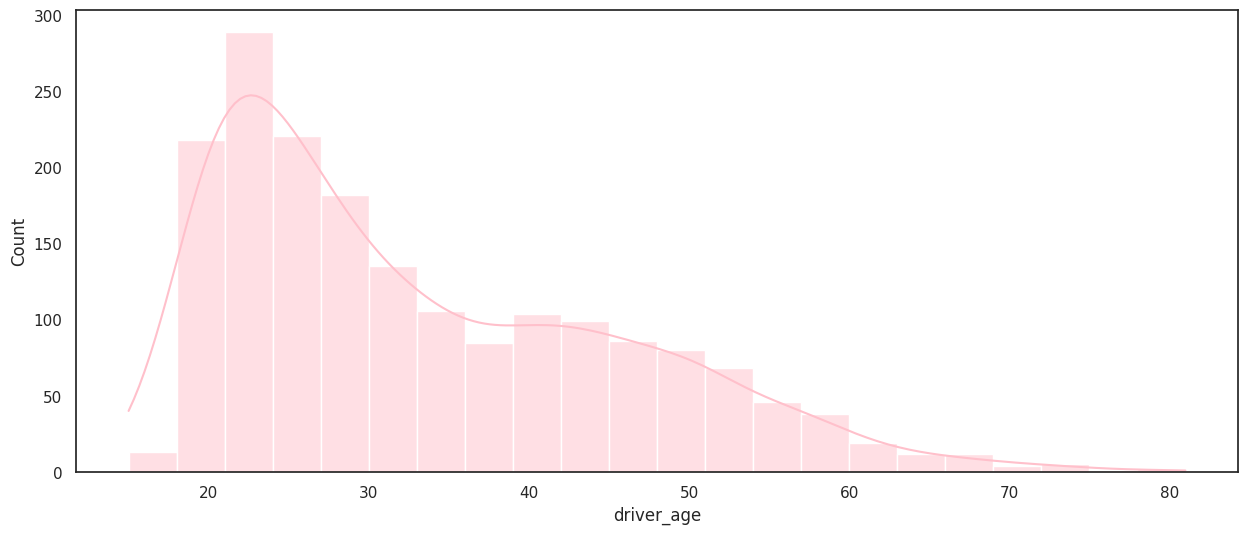

In [ ]:
plt.figure(figsize = (15,6))
sns.histplot(female.driver_age, color = '#FFC0CB', kde = True);


Again, to avoid scrolling, relist the table

In [ ]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,age_break_down
0,2010-01-01,0:39,M,1981.0,29.0,White,Other Traffic Violation,Moving violation,True,"Incident to Arrest,Probable Cause",Citation,False,16-30 Min,True,26 - 30
1,2010-01-01,1:28,M,1963.0,47.0,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,16-30 Min,False,46 - 50
2,2010-01-01,1:35,M,1988.0,22.0,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,30+ Min,False,18 - 25
3,2010-01-01,3:48,M,1952.0,58.0,Black,Call for Service,Other,False,NaN,Citation,False,16-30 Min,False,56 - 60
4,2010-01-01,10:04,M,1978.0,32.0,Black,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,31 - 35


Let's see the outcomes of stops

In [ ]:
counts = df['stop_outcome'].value_counts()
counts

Citation            6321
Warning              318
Arrest Driver        217
N/D                   71
Arrest Passenger      37
No Action             31
Name: stop_outcome, dtype: int64

Time to get icky into race

{'White': 4958, 'Black': 1034, 'Hispanic': 812, 'Asian': 162, 'Other': 29}


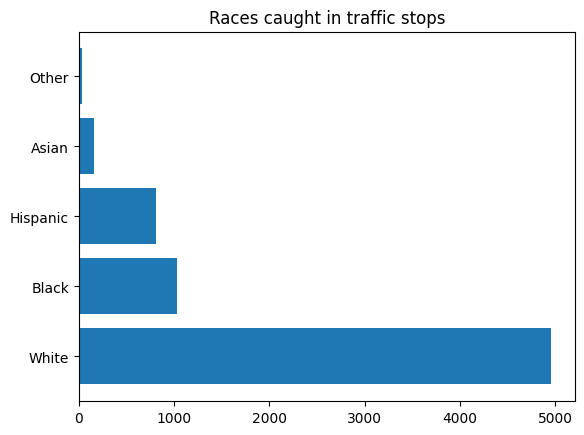

In [ ]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

counts = df['driver_race'].value_counts()
dictionary = dict(counts)

print(dictionary)
items = []
values = []

for _ in range(len(counts)):
    for item in dictionary:
        value = dictionary[item]
        items.append(item)
        values.append(value)

fig, ax = plt.subplots()
ax.barh(items, values)

labels = ax.get_xticklabels()


ax.set_title('Races caught in traffic stops')
plt.setp(ax.get_xticklabels(), rotation=0, ha='center')


plt.show()

Traffic stops caught on record

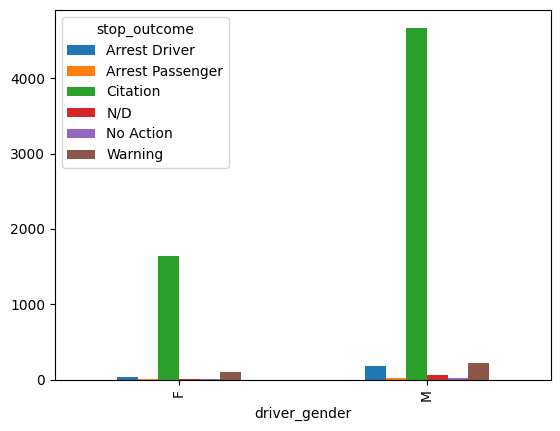

In [ ]:
import matplotlib.pyplot as plt
most_common_outcome = df.groupby(['driver_gender', 'stop_outcome']).size().unstack().fillna(0).plot(kind="bar")

<Axes: xlabel='driver_gender,stop_outcome'>

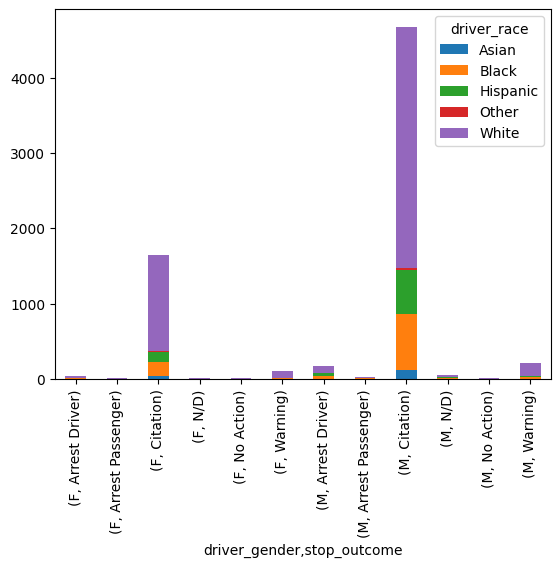

In [ ]:
most_common_outcome = df.groupby(['driver_gender', 'stop_outcome', 'driver_race' ]).size().unstack().fillna(0)
most_common_outcome.plot(kind='bar', stacked=True)

Checking Traffic stop counts by Race

6995


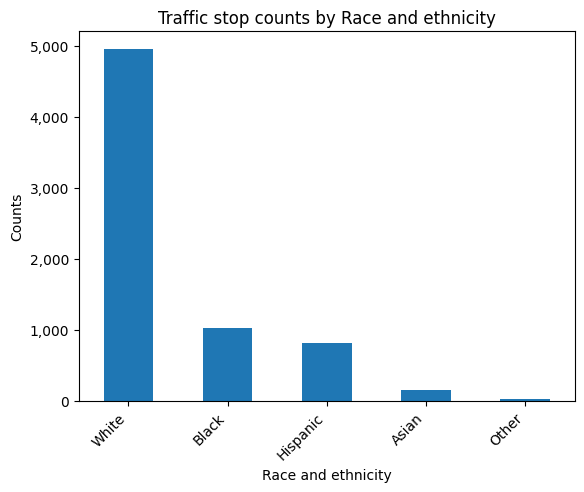

In [ ]:
ethnic_groups = df['driver_race'].value_counts()
print(ethnic_groups.sum())
ethnic_groups


# Create a stacked bar plot
ethnic_groups.plot(kind='bar',  stacked=False)
plt.xlabel('Race and ethnicity')
plt.ylabel('Counts')
plt.title('Traffic stop counts by Race and ethnicity')
plt.xticks(rotation=45, ha='right')
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

Let's set up the heatmap (correlation matrix)

<ipython-input-67-efc8c5dd8c85>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


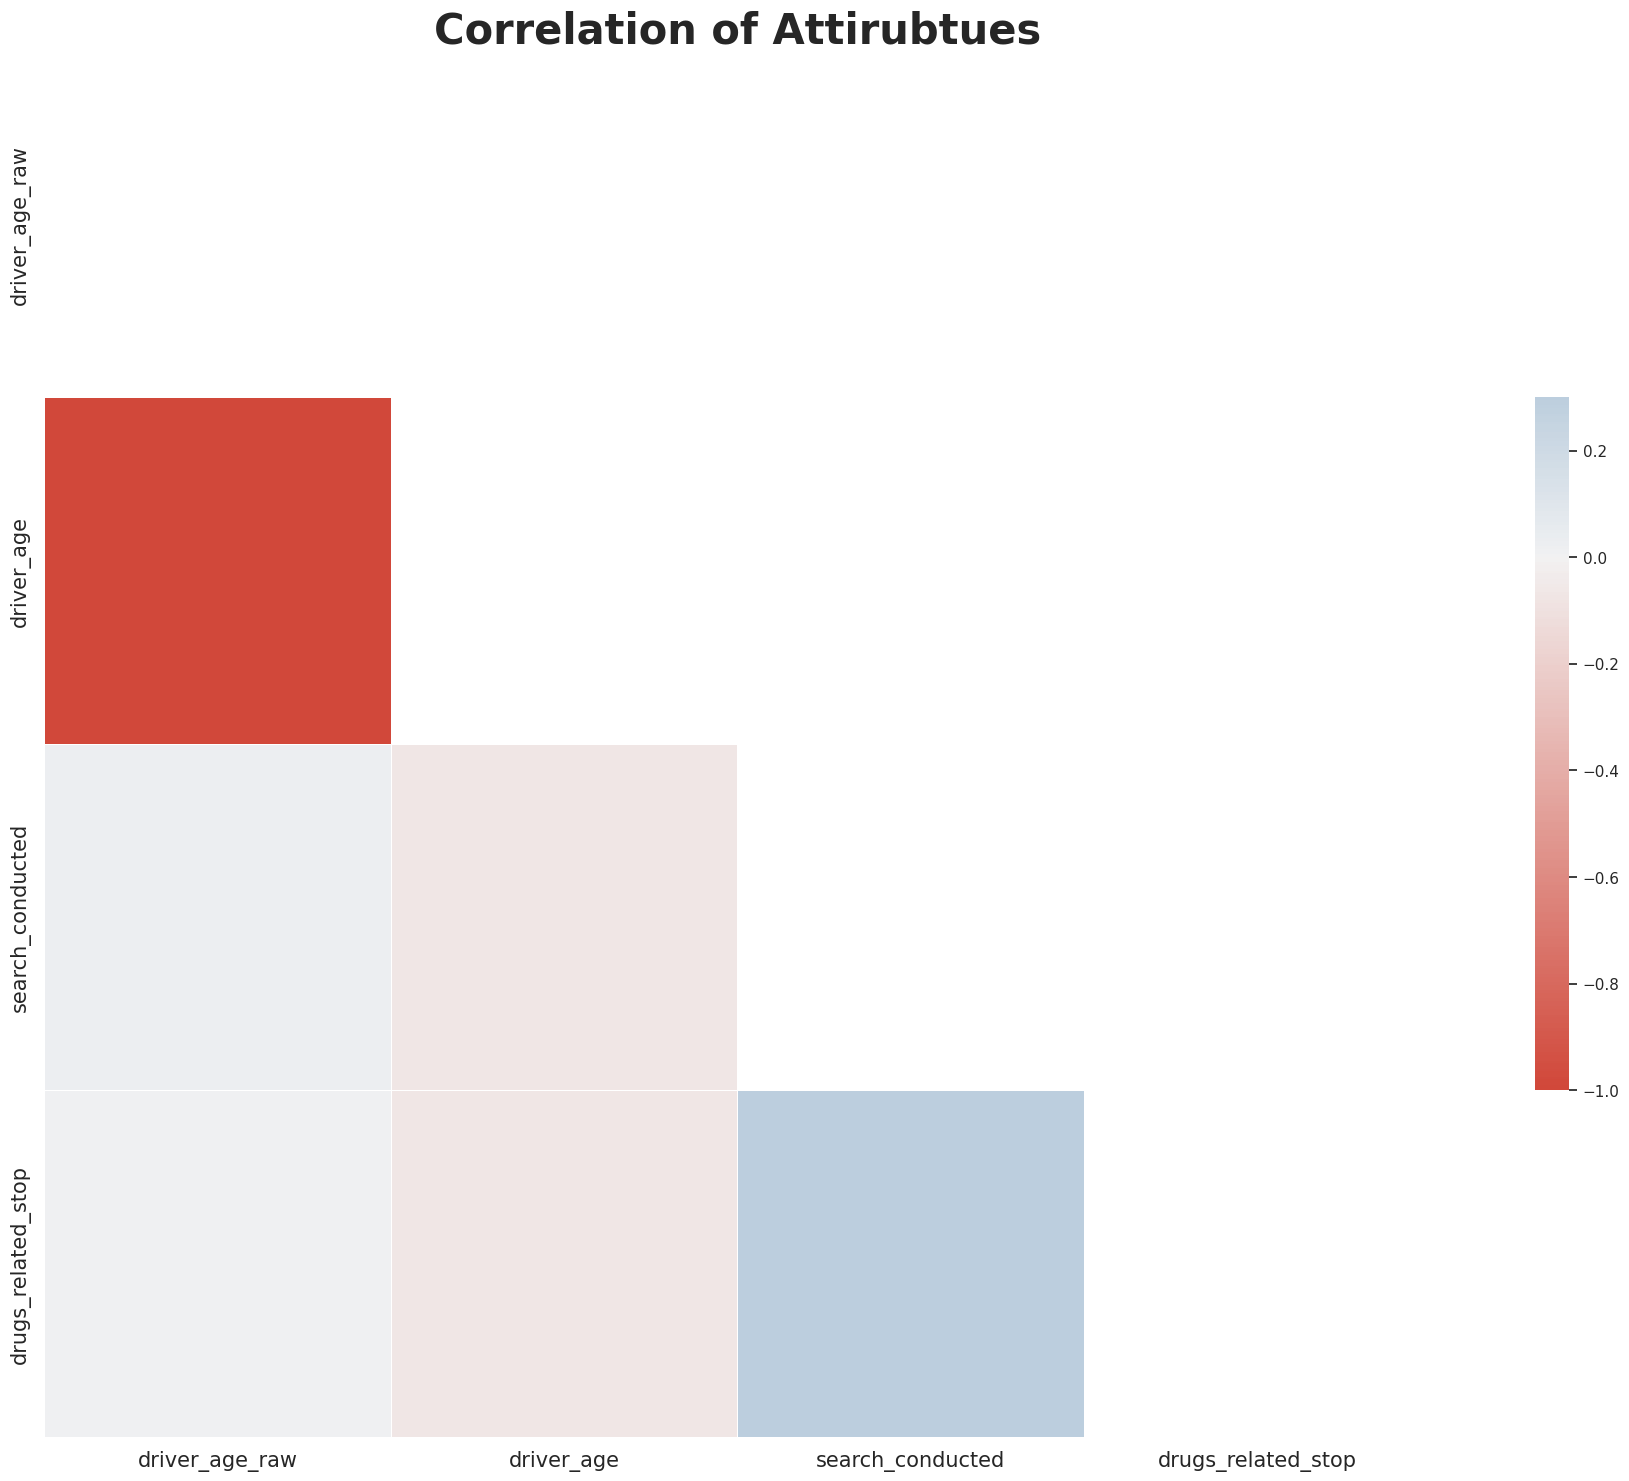

In [ ]:
import seaborn as sns

sns.set(style="white")
# Compute the correlation matrix
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(27,18))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(15,963 ,as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation of Attirubtues",fontsize=30,fontweight='bold')
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

Do men or women speed more often?

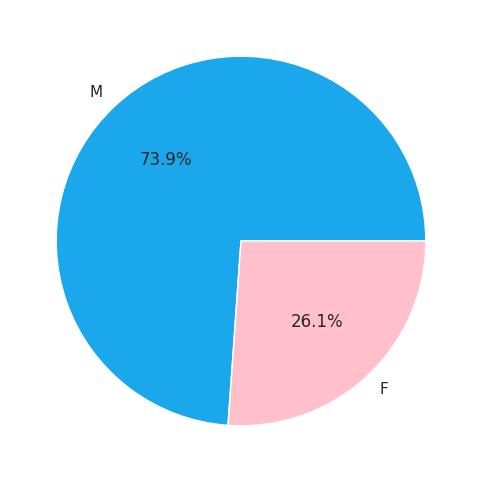

In [ ]:
df.driver_gender.value_counts()

plt.figure(figsize = (15,6))
plt.pie(df.driver_gender.value_counts(),
        labels =df.driver_gender.value_counts().index,
        colors = ['#1AA7EC', '#FFC0CB'],
       autopct='%.1f%%');


When a man is pulled over, what's generally the reason?

In [ ]:
df[df.driver_gender == "M"].violation.value_counts(normalize=True)

Speeding               0.474652
Moving violation       0.250774
Equipment              0.124420
Other                  0.106231
Registration/plates    0.043924
Name: violation, dtype: float64

When a woman is pulled over, what's generally the reason?

In [ ]:
df[df.driver_gender == "F"].violation.value_counts(normalize=True)

Speeding               0.688013
Moving violation       0.119869
Equipment              0.105638
Registration/plates    0.051998
Other                  0.034483
Name: violation, dtype: float64

Graphics

Text(0.5, 1.0, 'Violation of Men')

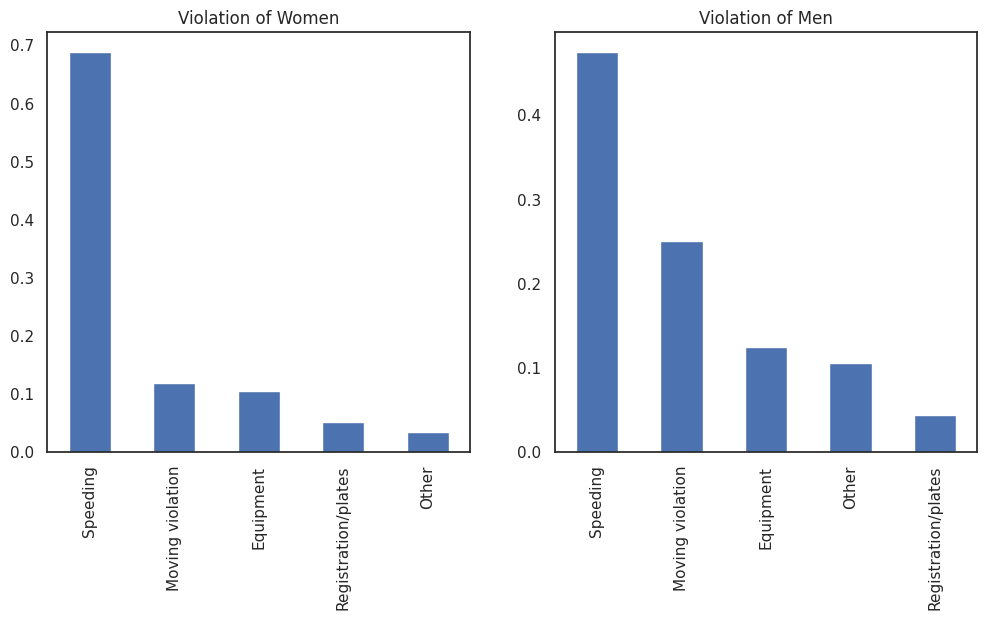

In [ ]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
df[df.driver_gender == "F"].violation.value_counts(normalize=True).plot(kind="bar")
plt.title("Violation of Women")

plt.subplot(2, 2, 2)
df[df.driver_gender == "M"].violation.value_counts(normalize=True).plot(kind="bar")
plt.title("Violation of Men")

Time for some clustering

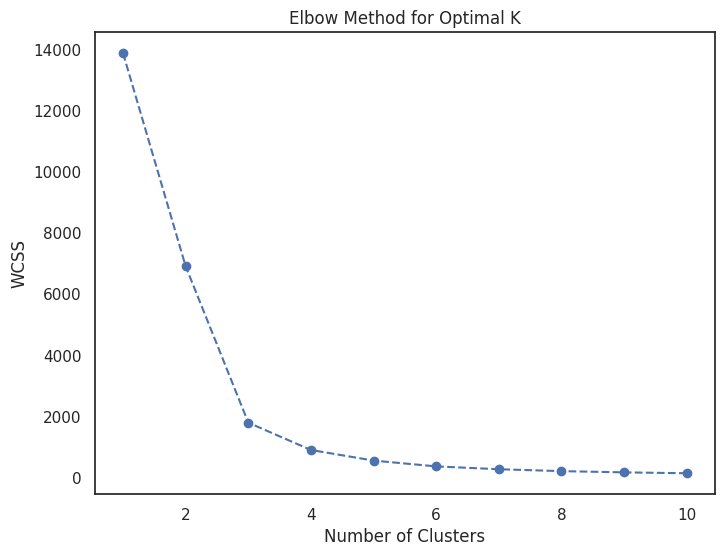

ValueError: Length of values (6952) does not match length of index (6995)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = df[['driver_age', 'drugs_related_stop']]

# Handle missing values if needed
features = features.dropna()

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Choose the number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve to determine the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()

# Based on the elbow method, choose the optimal K (let's say 3 for this example)
optimal_k = 3

# Fit K-means model
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(features_scaled)

# Add cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='driver_age', y='drugs_related_stop', hue='cluster', data=df, palette='viridis', style='cluster', s=100)
plt.title('K-means Clustering of Driver Age vs. Drugs Related Stop')
plt.xlabel('Driver Age')
plt.ylabel('Drugs Related Stop (Binary)')
plt.legend(title='Cluster', loc='upper right')
plt.show()

In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

# Load your dataset (replace with your file path)
df = pd.read_csv("traindata.csv")

# Select relevant features
selected_features = ["driver_gender", "driver_race"]

# Handle categorical features appropriately
if df["driver_gender"].dtype == "object":
    df["driver_gender"] = pd.Categorical(df["driver_gender"]).codes  # One-hot encoding
if df["driver_race"].dtype == "object":
    df["driver_race"] = pd.Categorical(df["driver_race"]).codes  # One-hot encoding

# Choose linkage method (e.g., 'ward' for minimizing within-cluster variance)
linkage = 'ward'

# Instantiate and fit Hierarchical Clustering model
hc = AgglomerativeClustering(n_clusters=3, linkage=linkage)  # Replace ... with your chosen number of clusters (3 in this case)
hc_labels = hc.fit_predict(df[selected_features])

# Add cluster labels to the DataFrame
df["cluster_labels"] = hc_labels

# View cluster distributions
print(df.groupby("cluster_labels").describe())


               county_name                              driver_gender  \
                     count mean std min 25% 50% 75% max         count   
cluster_labels                                                          
0                      0.0  NaN NaN NaN NaN NaN NaN NaN        4958.0   
1                      0.0  NaN NaN NaN NaN NaN NaN NaN        2037.0   
2                      0.0  NaN NaN NaN NaN NaN NaN NaN         566.0   

                          ... driver_age       driver_race                     \
                    mean  ...        75%   max       count     mean       std   
cluster_labels            ...                                                   
0               0.713392  ...       46.0  81.0      4958.0  4.00000  0.000000   
1               0.800687  ...       43.0  80.0      2037.0  1.34757  0.643816   
2              -1.000000  ...        NaN   NaN       566.0 -1.00000  0.000000   

                                         
                min  25%  50%  7

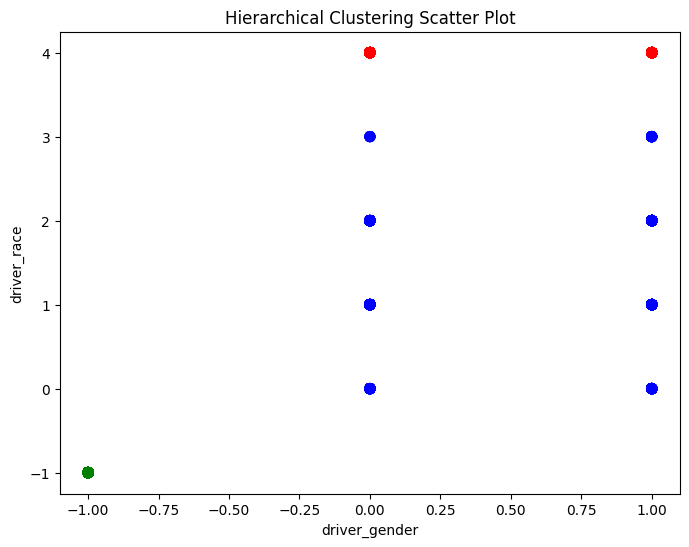

In [ ]:
import matplotlib.pyplot as plt

# Assign cluster colors
cluster_colors = {0: 'red', 1: 'blue', 2: 'green'}  # Adjust colors as needed
colors = [cluster_colors[label] for label in df['cluster_labels']]

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['driver_gender'], df['driver_race'], c=colors, s=50)
plt.xlabel("driver_gender")
plt.ylabel("driver_race")
plt.title("Hierarchical Clustering Scatter Plot")
plt.show()
